In [25]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\dsadm\appdata\local\programs\python\python39\lib\site-packages (1.5.2)




[notice] A new release of pip is available: 23.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # importa a biblioteca Kmeans
import matplotlib.pyplot as plt

In [27]:
#Criar um DataFrame com os dados dos vinhos
dados_vinhos = pd.DataFrame({
    'Teor Alcoólico': [3,4,5,6],
    'Acidez':['muito','pouco','médio','baixo'],
    'pH':[4.3,2.8,4.2,3.9]
})

In [28]:
dados_vinhos2 =pd.get_dummies(dados_vinhos,columns=['Acidez'])

In [30]:
#Aplicar o algoritimo K-means]
kmeans = KMeans(n_clusters=2) #definindo dos clusters
kmeans.fit(dados_vinhos2)

KMeans(n_clusters=2)

In [31]:
#Avaliar o desemprenho do modelo K-means
sse = kmeans.inertia_
print("SSE",sse)

SSE 5.086666666666668


In [32]:
#Visualizar os resultados da segmentação
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

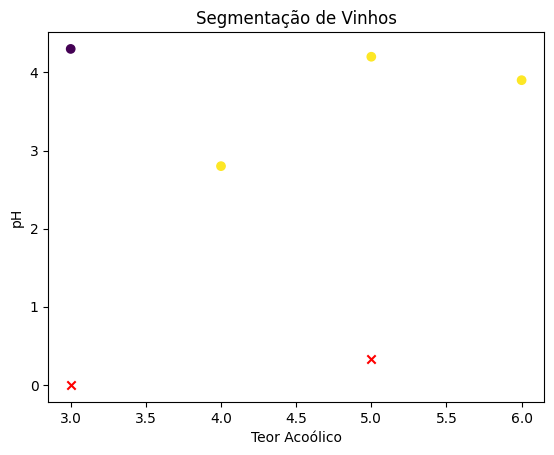

In [33]:
#Plotando um gráfico de dispersão dos vinhos com cores diferentes para cada grupo
plt.scatter(dados_vinhos['Teor Alcoólico'],dados_vinhos['pH'], c=labels)
plt.scatter(centroids[:,0],centroids[:,2],marker='x',color='red')
plt.xlabel('Teor Acoólico')
plt.ylabel('pH')
plt.title('Segmentação de Vinhos')
plt.show()

In [34]:
#Analisar os grupos resultantes
dados_vinhos['Grupo'] = labels
grouped_data = dados_vinhos.groupby('Grupo').mean()
print(grouped_data)

       Teor Alcoólico        pH
Grupo                          
0                 3.0  4.300000
1                 5.0  3.633333


C:\Users\dsadm\AppData\Local\Temp\ipykernel_4064\1269109880.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dados_vinhos.groupby('Grupo').mean()


In [35]:
from sklearn.metrics import silhouette_score

In [36]:
from sklearn.metrics import silhouette_score

silhouette_score(dados_vinhos2, kmeans.predict(dados_vinhos2))

0.11378863163303624

In [37]:
def avaliacao(dados_vinhos2):
    inercia = []

In [41]:
def avaliacao(dados_vinhos2):
    inercia = []
    silhueta = []

    for k in range(2,4):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_vinhos2)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_vinhos2, kmeans.predict(dados_vinhos2))))
        
    return silhueta, inercia

In [42]:
silhueta, inercia = avaliacao(dados_vinhos2)
silhueta

['k=2 - 0.23526948578906462', 'k=3 - 0.13901326404692418']

In [44]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 2 clusters: 0.235


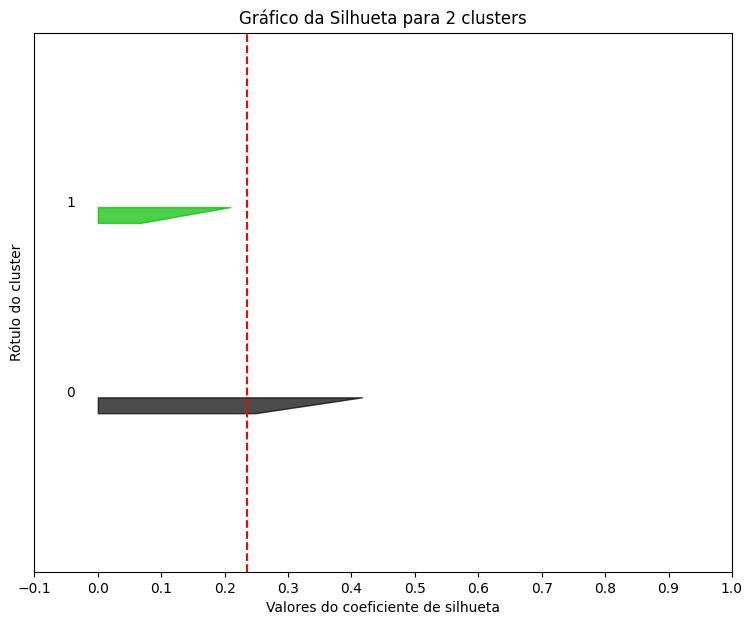

In [52]:
graf_silhueta(2, dados_vinhos2)

In [57]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,4),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

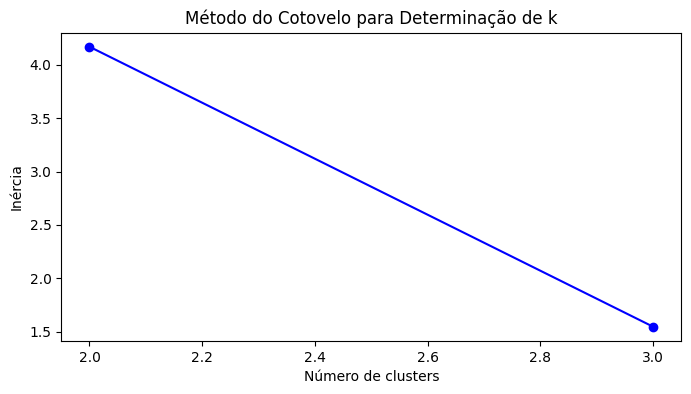

In [58]:
plot_cotovelo(inercia)